# Add together some light curves like a binary

In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from kepler_data import load_kepler_data
from astropy.stats import LombScargle

plotpar = {'axes.labelsize': 25,
           'font.size': 25,
           'legend.fontsize': 25,
           'xtick.labelsize': 25,
           'ytick.labelsize': 25,
           'text.usetex': True}
plt.rcParams.update(plotpar)

In [6]:
kids = pd.read_csv("../data/kids_with_lcs.txt")

In [44]:
lc_dir = "/Users/ruthangus/.kplr/data/lightcurves/{}".format(str(kids.KIC[0]).zfill(9))
x0, y0, yerr0 = load_kepler_data(lc_dir)
m = x0 < 350
m &= 300 < x0
x0, y0 = x0[m], y0[m]

lc_dir = "/Users/ruthangus/.kplr/data/lightcurves/{}".format(str(kids.KIC[1]).zfill(9))
x1, y1, yerr1 = load_kepler_data(lc_dir)
m = x1 < 350
m &= 300 < x1
x1, y1 = x1[m], y1[m]

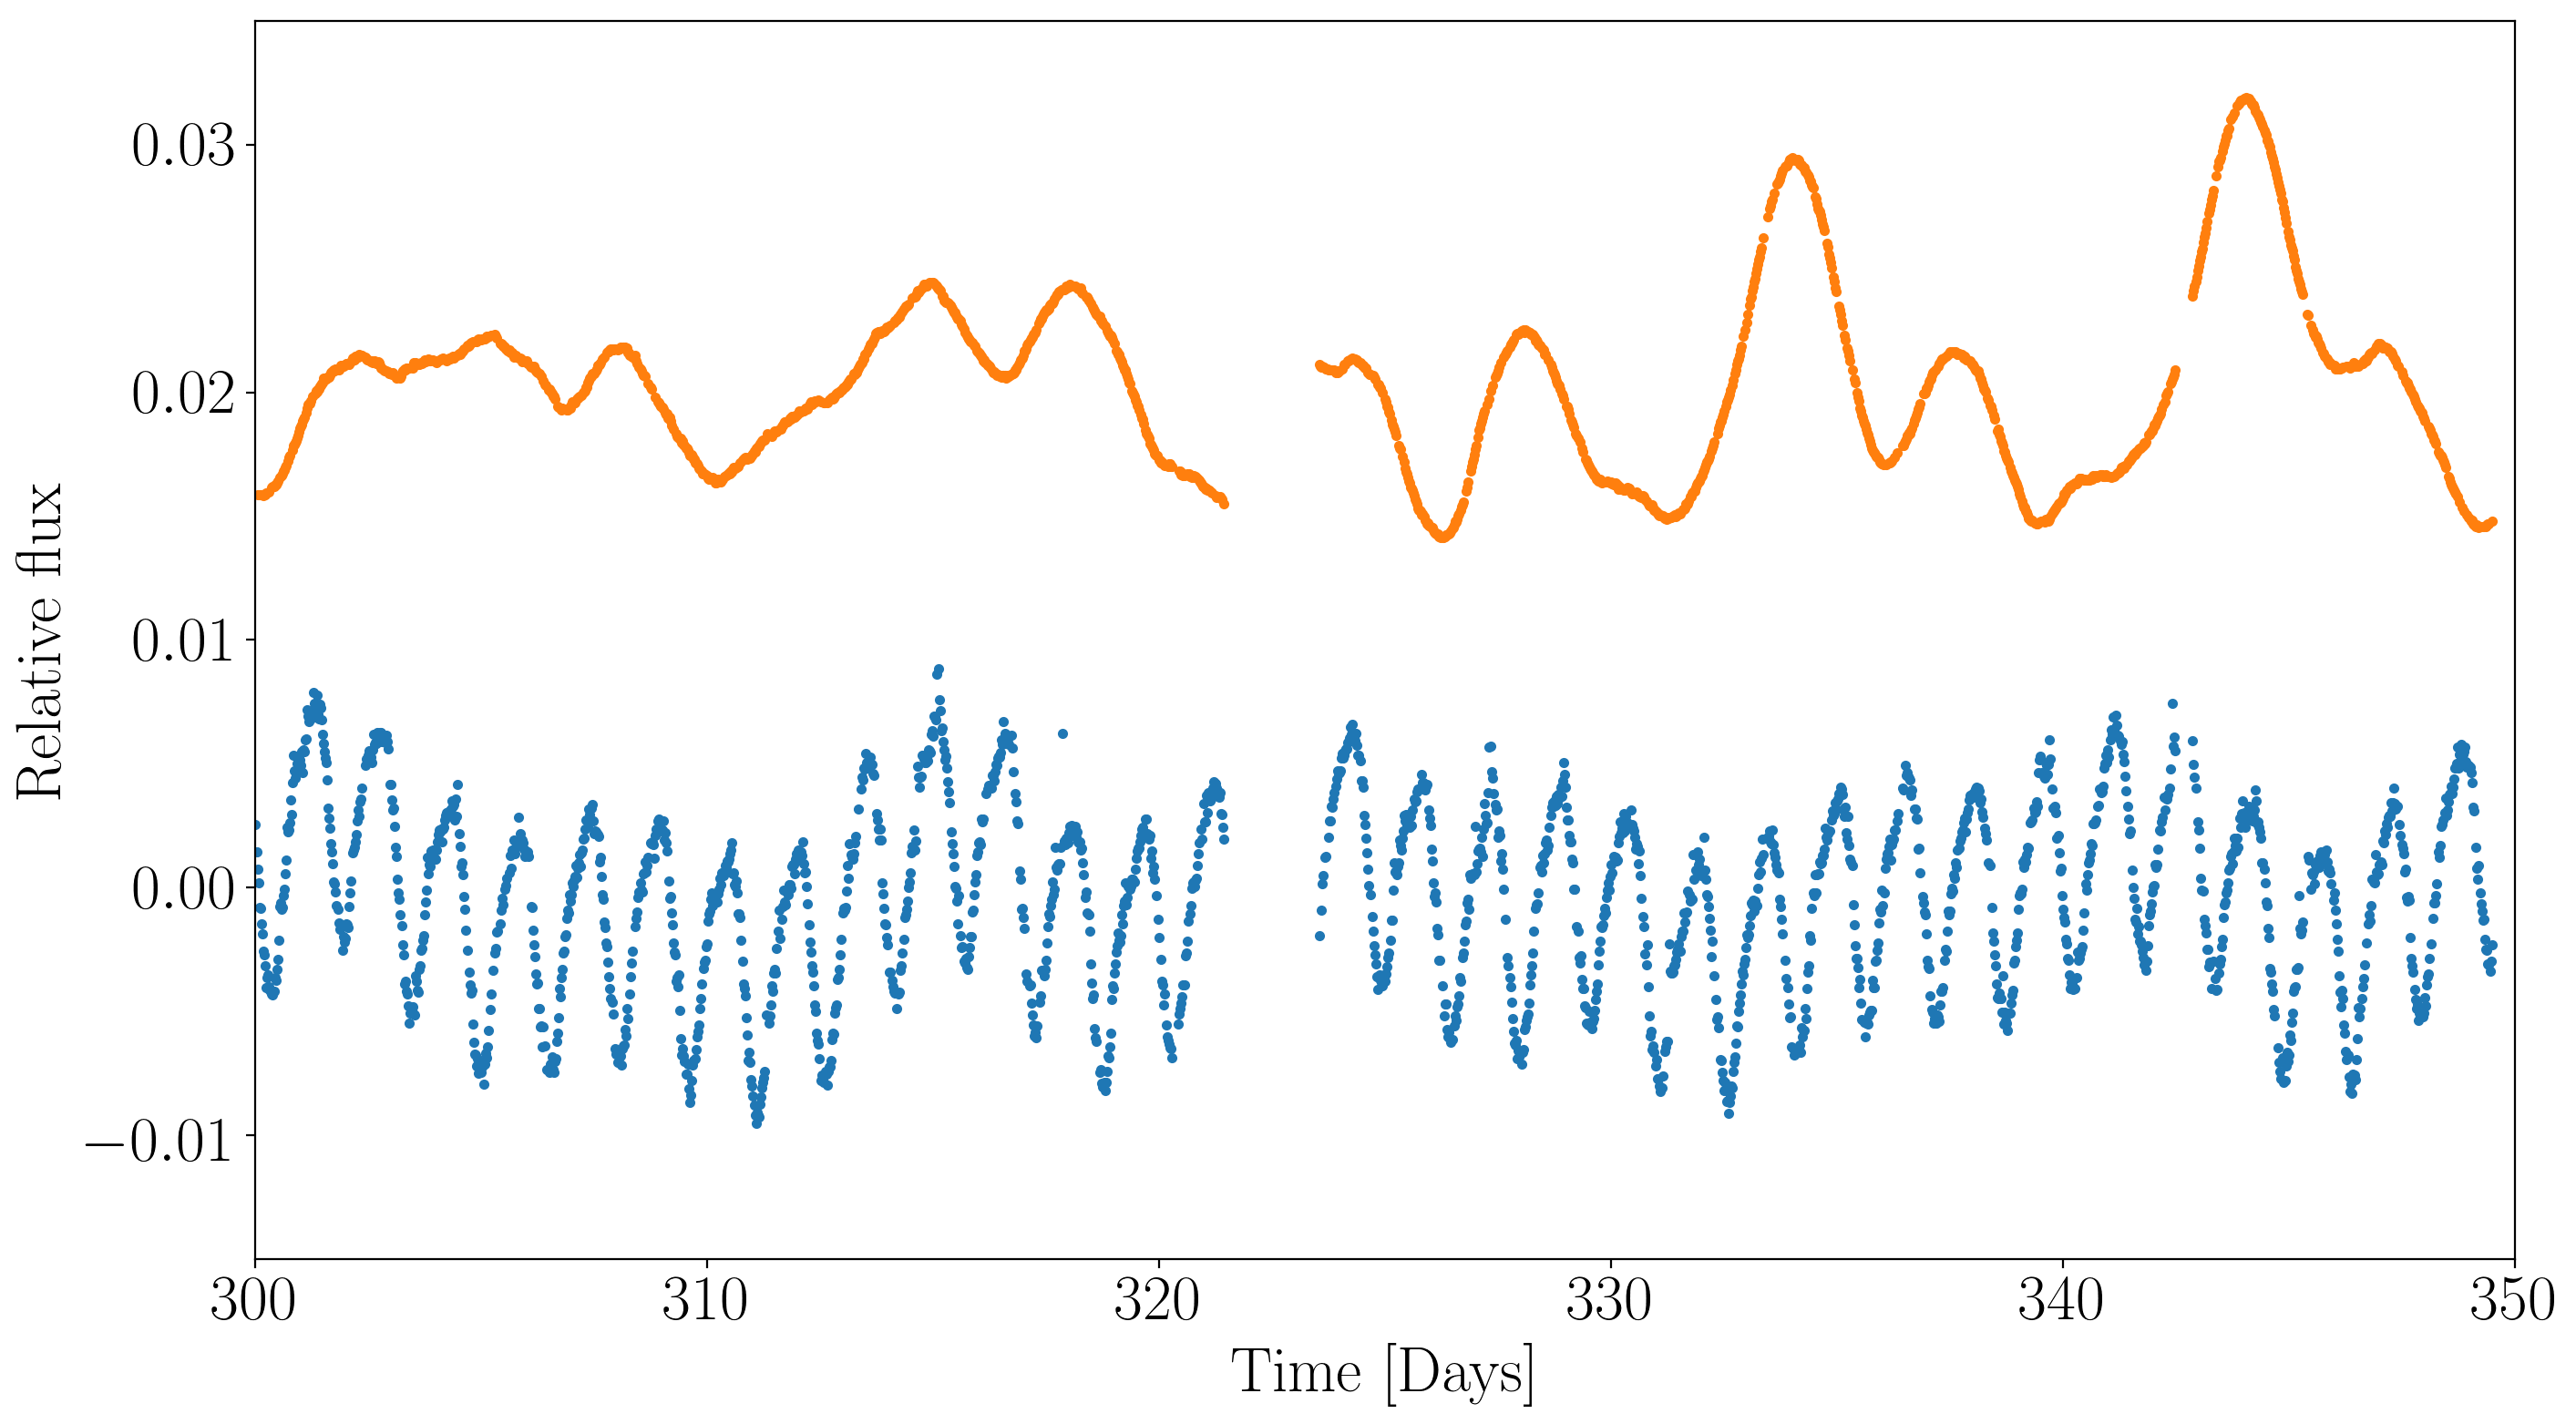

In [45]:
plt.figure(figsize=(16, 9), dpi=200)
plt.plot(x0, y0, ".")
plt.plot(x1, y1+.02, ".")
plt.xlim(300, 350)
plt.ylabel("$\mathrm{Relative~flux}$")
plt.xlabel("$\mathrm{Time~[Days]}$")
plt.ylim(-.015, .035)
plt.savefig("../plots/two_light_curves.pdf")

ValueError: operands could not be broadcast together with shapes (1836,) (2055,) 

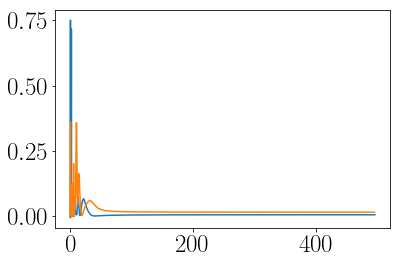

In [46]:
frequency0, power0 = LombScargle(x0, y0).autopower()
plt.plot(1./frequency0, power0)

frequency1, power1 = LombScargle(x1, y1).autopower()
plt.plot(1./frequency1, power1)

frequency01, power01 = LombScargle(x1, y1+y0).autopower()
plt.plot(1./frequency01, power01)

plt.xlim(0, 10)